In [1]:
%%html 
<link href="https://fonts.googleapis.com/css?family=Open+Sans" rel="stylesheet">
<style>#notebook-container{font-size: 13pt;font-family:'Open Sans', sans-serif;} div.text_cell{max-width: 104ex;}</style>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

# Random Forests (Ensembles of Decision Trees)

A random forest is essentially a collection of decision trees, where each tree is slightly different from the other. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.

## Building random forests

To build a random forest model, we need to decide on the number of trees to build (the `n_estimators` parameter of `RandomForestRegressor` or `RandomForestClassifier`. The number of features that are selected is controlled by the `max_features` parameter.

A high `max_features` means that the trees in the random forest will be quite simimlar, and they will be able to fit the data easily, using the most distinctive features. A low `max_features` means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.

## Analyzing random forests

Let's apply a random forest consisting of five trees to the `two_moons` dataset.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

The trees that are built as part of the random forest are stored in the `estimator_` attribute.

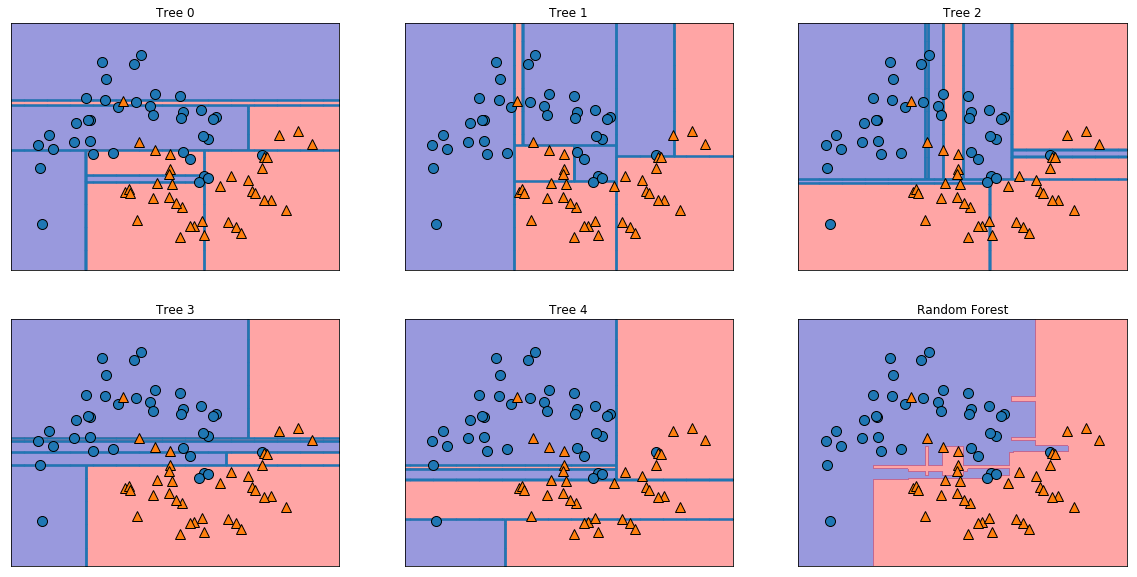

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

You can clearly see that the decision boundaries learned by the five trees are quite different. The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary. In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries.

As another example, let's apply a random forest consisting of 100 trees on the Breast Cancer dataset.

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Training set score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(forest.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.972


The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters. 

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', facecolor='b', alpha=0.4)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

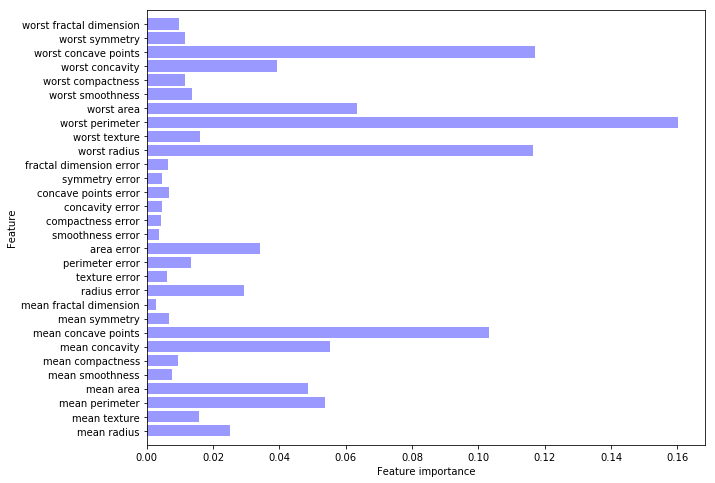

In [21]:
plot_feature_importances_cancer(forest)

## Parameters

The important parameters to adjust are `n_estimators`, `max_features`, and possibly pre-pruning options like `max_depth`. For `n_estimators`, larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting. However, there are diminishing results.

It's a good rule of thumb to use the default values: `max_features=sqrt(n_features)` for classification and `max_features=n_features` for regression.

Adding `max_features` or `max_leaf_nodes` might sometimes improve performance. It can also drastically reduce space and time requirements for training and prediction.

It can be parallelized across multiple CPU cores within a computer easily. You can use the `n_jobs` parameter to adjust the number of cores to use, leading to linear speed-ups (or use `n_jobs=-1` to use all cores).

If you want to have reproducible results it is important to fix the `random_state`.

## Strengths

Random forests for regression and classification are currently among the most widely used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and don't require scaling of data.

## Weaknesses

Random forests don't tend to perform well on very high dimensional, sparse data, such as text data. For this kind of data, linear models might be more appropriate.